In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
housing=pd.read_csv('housing.csv')

In [10]:
housing.info()
len(housing.Suburb.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

351

# Background Information
# The data explores the detailed information of housing located in 351 suburbs in Melhourne. Melbourne is the second-most populous city in Australia, which has prosperous education, economy, entertainment, tourism and etc. Usually, the price of housing varies in a large range, especially in a big city like Melbourne, depends on furnishment, sqft, distance to CBD and neighborhood. We are interested in what partern of housing characteristics will affect the price at different suburbs in Melbourne ciy. 

# Information about data collection
# Tony Pino collected the data starting from 2016. This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

# Exploratory Analysis

# 1. Summary statistics and the distributional shape of variables in the data

In [45]:
housing.describe()
print(housing.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0  3/09/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3  4/02/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4  4/03/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

In [58]:
housing = housing.loc[housing['Bathroom'].isnull() == False]

In [62]:
housing = housing.loc[housing['Bedroom2'].isnull() == False]

In [63]:
housing = housing.loc[housing['Car'].isnull()==False]

In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26129 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           26129 non-null object
Address          26129 non-null object
Rooms            26129 non-null int64
Type             26129 non-null object
Price            20423 non-null float64
Method           26129 non-null object
SellerG          26129 non-null object
Date             26129 non-null object
Distance         26129 non-null float64
Postcode         26129 non-null float64
Bedroom2         26129 non-null float64
Bathroom         26129 non-null float64
Car              26129 non-null float64
Landsize         22671 non-null float64
BuildingArea     13510 non-null float64
YearBuilt        15298 non-null float64
CouncilArea      26129 non-null object
Lattitude        26103 non-null float64
Longtitude       26103 non-null float64
Regionname       26129 non-null object
Propertycount    26129 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

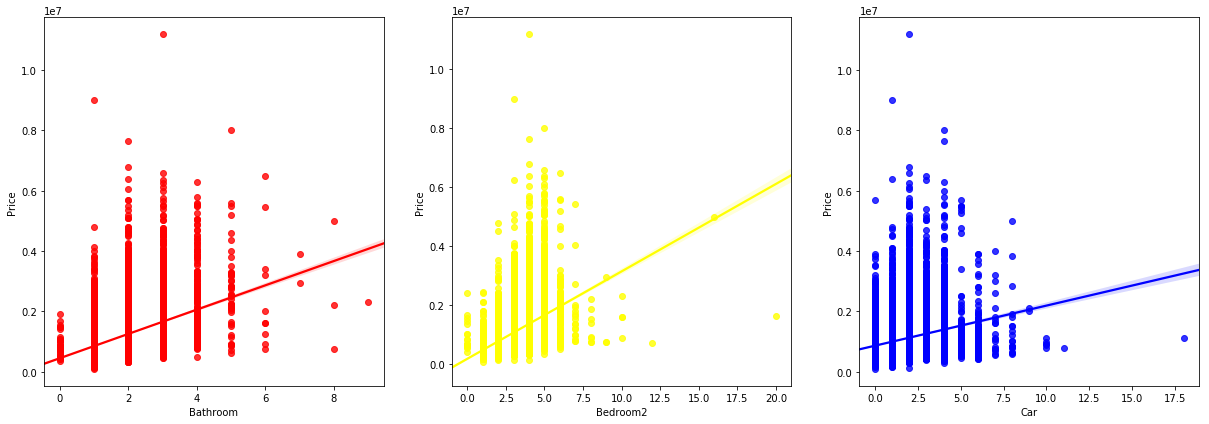

In [86]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20.7, 6.78)
sns.regplot(housing.Bathroom,housing.Price,color="red",ax=axs[0])
sns.regplot(housing.Bedroom2,housing.Price,color="yellow",ax=axs[1])
sns.regplot(housing.Car,housing.Price,color="blue",ax=axs[2])

In [77]:
housing.Price.corr(housing.Bathroom)

0.43218869606896443

In [78]:
housing.Price.corr(housing.Bedroom2)

0.43288781517514086

In [79]:
housing.Price.corr(housing.Car)

0.20180256061576404

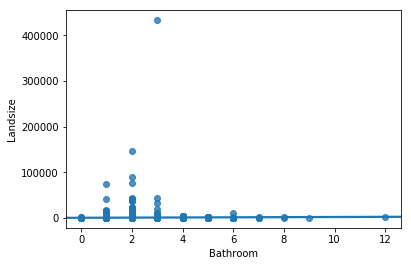

In [80]:
sns.regplot(housing.Bathroom, housing.Landsize)
sns.regplot(housing.Bdthroom, housing.Landsize)

In [81]:
housing.Landsize.corr(housing.Bathroom)

0.0365224930968817

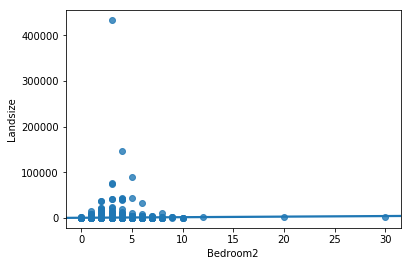

In [82]:
sns.regplot(housing.Bedroom2, housing.Landsize)

In [83]:
housing.Landsize.corr(housing.Bedroom2)

0.03652547092126999

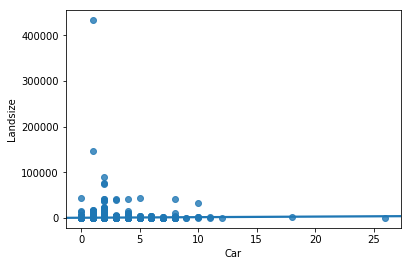

In [84]:
sns.regplot(housing.Car, housing.Landsize)

In [85]:
housing.Landsize.corr(housing.Car)

0.03782942988196447

In [ ]:
Altona_cols = [col for col in df.columns if 'spike' in col]

In [91]:
housing = housing.loc[housing['Price'].isnull()==False]
housing = housing.loc[housing['Suburb'].isnull()==False]
pricemean=housing.groupby('Suburb')["Price"].mean()
pricemean

Suburb
Abbotsford            1.072066e+06
Aberfeldie            1.354793e+06
Airport West          7.805294e+05
Albanvale             5.360556e+05
Albert Park           1.990072e+06
Albion                6.238113e+05
Alphington            1.442977e+06
Altona                8.729179e+05
Altona Meadows        6.686042e+05
Altona North          8.256474e+05
Ardeer                6.334250e+05
Armadale              1.606459e+06
Ascot Vale            1.102584e+06
Ashburton             1.741074e+06
Ashwood               1.216381e+06
Aspendale             1.039000e+06
Aspendale Gardens     9.244833e+05
Attwood               7.543636e+05
Avondale Heights      8.298727e+05
Bacchus Marsh         4.230000e+05
Balaclava             8.387121e+05
Balwyn                1.998471e+06
Balwyn North          1.856250e+06
Bayswater             7.678846e+05
Bayswater North       7.526571e+05
Beaconsfield          6.035000e+05
Beaconsfield Upper    7.195000e+05
Beaumaris             1.717212e+06
Bellfield    

In [ ]:

housing['YearDecades'] = pd.cut(housing.YearBuilt,[20,30,40,50,60,70,80,150],right=False)